In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [60]:
import cufflinks as cf
cf.go_offline()

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
train = pd.read_csv('../resources/logisticRegression/titanic_train.csv');

In [3]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
train.isnull()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False  False     False  
2    False   True     False  
3    False  False     False  
4    False   True     False  
..     ...    ...       ...  
886  False   True     False  
887  False  False     False  
888  False   True     False  
889  False  False     False  
890  False   True     False  

[891 rows x 12 columns]

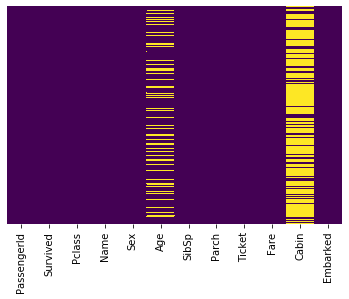

In [5]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [6]:
sns.set_style('whitegrid')

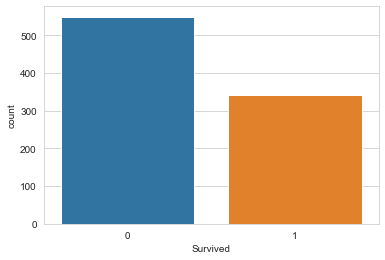

In [8]:
sns.countplot(data=train, x='Survived')

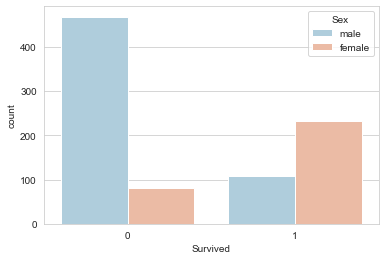

In [10]:
sns.countplot(data=train, x='Survived', hue='Sex', palette='RdBu_r')

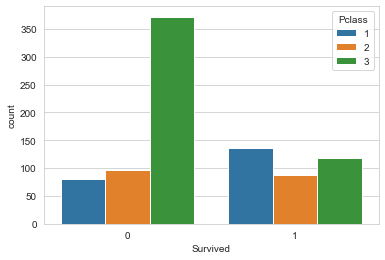

In [11]:
sns.countplot(data=train, x='Survived', hue='Pclass')

In [13]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

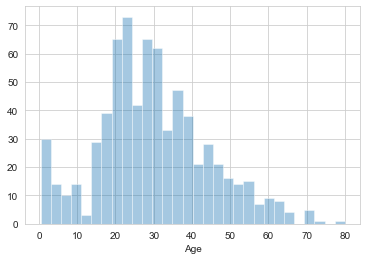

In [14]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

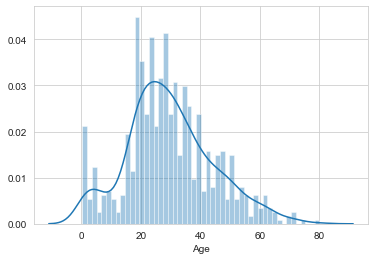

In [17]:
sns.distplot(train['Age'], bins=50)

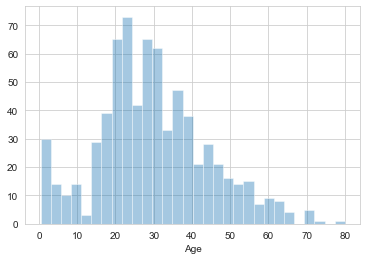

In [21]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

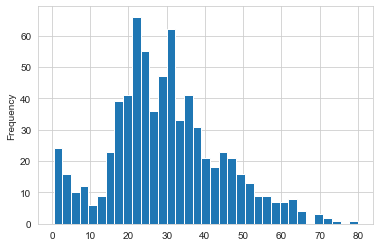

In [22]:
train['Age'].plot.hist(bins=35)

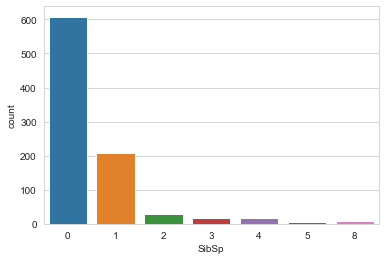

In [23]:
sns.countplot(x='SibSp', data=train)

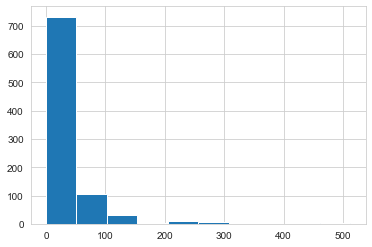

In [24]:
train['Fare'].hist()

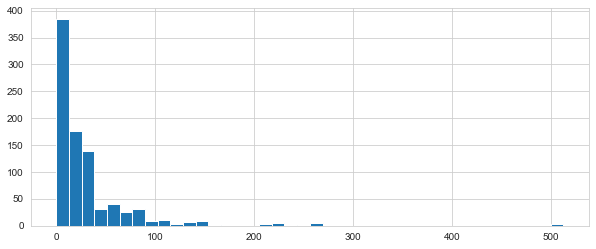

In [25]:
train['Fare'].hist(bins=40, figsize=(10,4))

In [28]:
train['Fare'].iplot(kind='hist', bins=30)

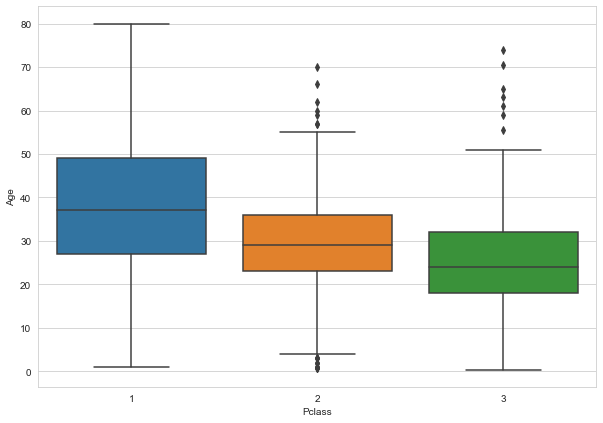

In [30]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [32]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [35]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

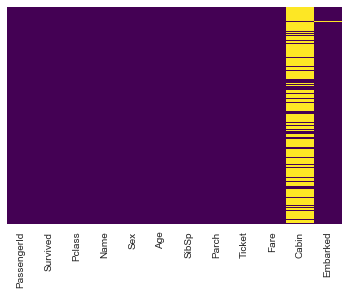

In [37]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [38]:
train.drop('Cabin', axis=1, inplace=True)

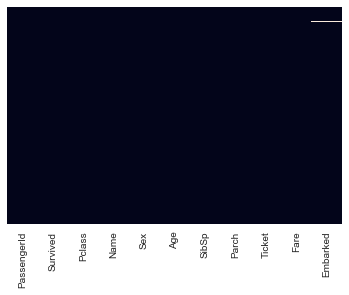

In [39]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [40]:
train.dropna(inplace=True)

In [41]:
pd.get_dummies(train['Sex'])

female  male
0         0     1
1         1     0
2         1     0
3         1     0
4         0     1
..      ...   ...
886       0     1
887       1     0
888       1     0
889       0     1
890       0     1

[889 rows x 2 columns]

In [43]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
sex.head()

male
0     1
1     0
2     0
3     0
4     1

In [45]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [46]:
pd.get_dummies(train['Embarked'])

C  Q  S
0    0  0  1
1    1  0  0
2    0  0  1
3    0  0  1
4    0  0  1
..  .. .. ..
886  0  0  1
887  0  0  1
888  0  0  1
889  1  0  0
890  0  1  0

[889 rows x 3 columns]

In [48]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [49]:
embark.head()

Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1

In [50]:
train = pd.concat([train, sex, embark], axis=1)

In [51]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   24      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   37      1   
2                             Heikkinen, Miss. Laina  female   24      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   37      1   
4                           Allen, Mr. William Henry    male   24      0   

   Parch            Ticket     Fare Embarked  male  Q  S  
0      0         A/5 21171   7.2500        S     1  0  1  
1      0          PC 17599  71.2833        C     0  0  0  
2      0  STON/O2. 3101282   7.9250        S     0  0  1  
3      0            113803  53.1000        S     0  0  1  
4      0            373450   8.0500        S     1  0  1

In [52]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [53]:
train.head()

PassengerId  Survived  Pclass  Age  SibSp  Parch     Fare  male  Q  S
0            1         0       3   24      1      0   7.2500     1  0  1
1            2         1       1   37      1      0  71.2833     0  0  0
2            3         1       3   24      0      0   7.9250     0  0  1
3            4         1       1   37      1      0  53.1000     0  0  1
4            5         0       3   24      0      0   8.0500     1  0  1

In [54]:
train.drop('PassengerId', axis=1, inplace=True)

In [55]:
train[:4]

Survived  Pclass  Age  SibSp  Parch     Fare  male  Q  S
0         0       3   24      1      0   7.2500     1  0  1
1         1       1   37      1      0  71.2833     0  0  0
2         1       3   24      0      0   7.9250     0  0  1
3         1       1   37      1      0  53.1000     0  0  1

In [56]:
### Part 3 ###

In [57]:
x = train.drop('Survived', axis=1)
y = train['Survived']

In [58]:
x.head()

Pclass  Age  SibSp  Parch     Fare  male  Q  S
0       3   24      1      0   7.2500     1  0  1
1       1   37      1      0  71.2833     0  0  0
2       3   24      0      0   7.9250     0  0  1
3       1   37      1      0  53.1000     0  0  1
4       3   24      0      0   8.0500     1  0  1

In [59]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [68]:
logmodel = LogisticRegression()

In [69]:
logmodel.fit(x_train, y_train)

C:\Installations\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
predictions = logmodel.predict(x_test)

In [72]:
predictions[:5]

array([0, 0, 1, 1, 0], dtype=int64)

In [74]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       163
           1       0.84      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.82      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [76]:
confusion_matrix(y_test, predictions)

array([[150,  13],
       [ 36,  68]], dtype=int64)